#  Breast Cancer ML Research for Kenya  
# Introduction
This project aims to predict breast cancer diagnosis as malignant or benign using machine learning models. Various algorithms, including Logistic Regression, KNN, Random Forest, XGBoost, and AdaBoost, were applied to the Breast Cancer dataset to evaluate their performance. The goal is to identify the most accurate and reliable model for early detection and diagnosis of breast cancer.


In [75]:
#importing necessary libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #for model evaluation


In [76]:
# loading dataset

df = pd.read_csv('Breast _Cancer.csv') # Breast Cancer Wisconsin Diagnostic (WDBC) dataset
# displaying first 5 rows of dataset
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [77]:
#Number of rows and columns in dataset
df.shape

(569, 33)

In [78]:
# printing the column names of dataset
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [79]:
#printing the tail of dataset
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [80]:
# Dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# EDA 

In [81]:
# checking for missing values
print(df.isnull().sum()) # no missing values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [82]:
#removing unnecessary columns
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [83]:
#check the dataset after removing unnecessary columns
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [84]:
# printing the column names of dataset
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [85]:
df.shape

(569, 31)

In [86]:
# statistical measures about the dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [87]:
df['diagnosis'].unique() # unique values in diagnosis column

array(['M', 'B'], dtype=object)

In [88]:
# converting categorical values to numerical values using lambda function
# M=malignant , B=benign Convert diagnosis:M = 1, B = 0

df['diagnosis']=df['diagnosis'].apply(lambda val: 1 if val=='M' else 0)

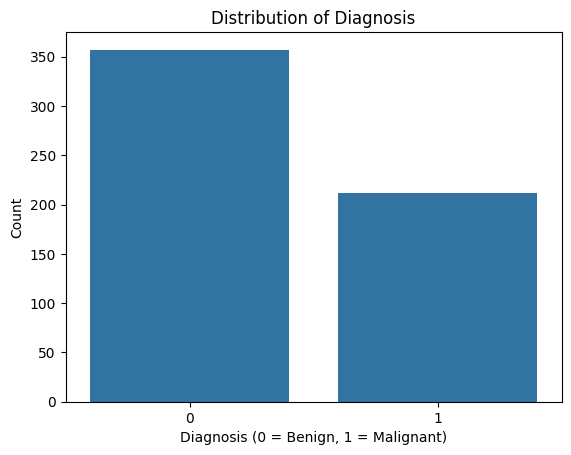

In [89]:
#Distribution of diagnosis column

sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()



In [90]:
df.corr() # correlation between different columns - correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.
# positive correlation - both variables increase or decrease together
# negative correlation - one variable increases while the other decreases
# A positive correlation means:

# As one feature increases, the other tends to increase.

# A negative correlation means:

# As one increases, the other tends to decrease.

# A magnitude:

# >0.7 → very strong relation

# 0.4–0.7 → medium

# 0.1–0.4 → weak

# ~0 → no linear relationship

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


The presence of multicollinearity between some of the variables. For instance, the radius_mean column has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns, respectively. This is probably because the three columns  contain the same information.

Another place where multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the radius_mean column has a correlation of 0.97 with the radius_worst column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns.so it is essential to remove some of the columns 

Similarly, it seems like there is multicollinearity between the attributes compactness, concavity, and concave points. Just like what we did with the size attributes, we should pick only one of these three attributes that contain information on the shape of the cell.

In [91]:
# # dropping columns with high correlation to avoid multicollinearity
df.drop(columns=['perimeter_mean','area_mean','compactness_mean','concavity_mean','perimeter_worst','area_worst','compactness_worst','concavity_worst','texture_se','smoothness_se','symmetry_se','fractal_dimension_worst'],inplace=True)

In [92]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'smoothness_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [93]:
# dropping diagnosis column for correlation heatmap
df.drop(columns=['diagnosis']) 

,radius_mean,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,concave points_worst,symmetry_worst
0,17.99,10.38,0.11840,0.14710,0.2419,0.07871,1.0950,8.589,153.40,0.04904,0.05373,0.01587,0.006193,25.380,17.33,0.16220,0.2654,0.4601
1,20.57,17.77,0.08474,0.07017,0.1812,0.05667,0.5435,3.398,74.08,0.01308,0.01860,0.01340,0.003532,24.990,23.41,0.12380,0.1860,0.2750
2,19.69,21.25,0.10960,0.12790,0.2069,0.05999,0.7456,4.585,94.03,0.04006,0.03832,0.02058,0.004571,23.570,25.53,0.14440,0.2430,0.3613
3,11.42,20.38,0.14250,0.10520,0.2597,0.09744,0.4956,3.445,27.23,0.07458,0.05661,0.01867,0.009208,14.910,26.50,0.20980,0.2575,0.6638
4,20.29,14.34,0.10030,0.10430,0.1809,0.05883,0.7572,5.438,94.44,0.02461,0.05688,0.01885,0.005115,22.540,16.67,0.13740,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.13890,0.1726,0.05623,1.1760,7.673,158.70,0.02891,0.05198,0.02454,0.004239,25.450,26.40,0.14100,0.2216,0.2060
565,20.13,28.25,0.09780,0.09791,0.1752,0.05533,0.7655,5.203,99.04,0.02423,0.03950,0.01678,0.002498,23.690,38.25,0.11660,0.1628,0.2572
566,16.60,28.08,0.08455,0.05302,0.1590,0.05648,0.4564,3.425,48.55,0.03731,0.04730,0.01557,0.003892,18.980,34.12,0.11390,0.1418,0.2218
567,20.60,29.33,0.11780,0.15200,0.2397,0.07016,0.7260,5.772,86.22,0.06158,0.07117,0.01664,0.006185,25.740,39.42,0.16500,0.2650,0.4087


In [94]:
corr_matrix = df.corr()
print(corr_matrix)

                        diagnosis  radius_mean  texture_mean  smoothness_mean  \
diagnosis                1.000000     0.730029      0.415185         0.358560   
radius_mean              0.730029     1.000000      0.323782         0.170581   
texture_mean             0.415185     0.323782      1.000000        -0.023389   
smoothness_mean          0.358560     0.170581     -0.023389         1.000000   
concave points_mean      0.776614     0.822529      0.293464         0.553695   
symmetry_mean            0.330499     0.147741      0.071401         0.557775   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437         0.584792   
radius_se                0.567134     0.679090      0.275869         0.301467   
perimeter_se             0.556141     0.674172      0.281673         0.296092   
area_se                  0.548236     0.735864      0.259845         0.246552   
compactness_se           0.292999     0.206000      0.191975         0.318943   
concavity_se             0.2

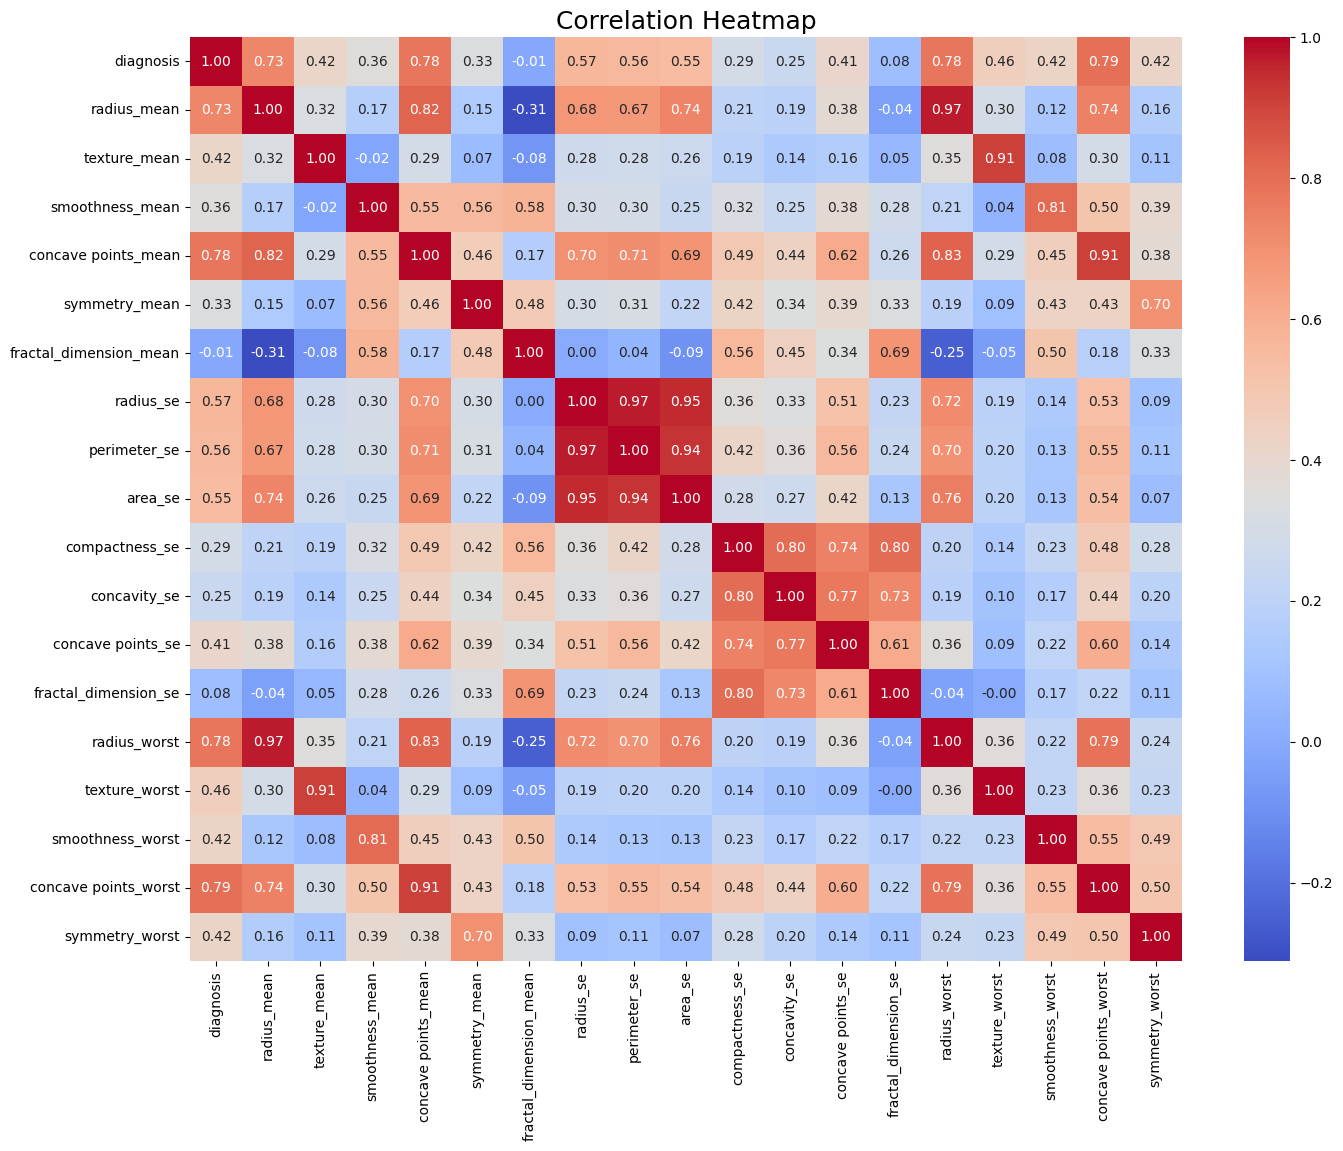

In [95]:
#plotting the heatmap to visualize correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True,fmt=".2f",cmap="coolwarm",cbar=True,)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

# Selecting features and targets

In [96]:
#separating features and target
#selected features
selected_features=['radius_mean', 'texture_mean', 'smoothness_mean','concave points_mean', 'symmetry_mean','radius_se',
'radius_worst', 'texture_worst', 'smoothness_worst','concave points_worst', 'symmetry_worst']
x=df[selected_features]
print(x)
y=df['diagnosis']
print(y)

     radius_mean  texture_mean  smoothness_mean  concave points_mean  \
0          17.99         10.38          0.11840              0.14710   
1          20.57         17.77          0.08474              0.07017   
2          19.69         21.25          0.10960              0.12790   
3          11.42         20.38          0.14250              0.10520   
4          20.29         14.34          0.10030              0.10430   
..           ...           ...              ...                  ...   
564        21.56         22.39          0.11100              0.13890   
565        20.13         28.25          0.09780              0.09791   
566        16.60         28.08          0.08455              0.05302   
567        20.60         29.33          0.11780              0.15200   
568         7.76         24.54          0.05263              0.00000   

     symmetry_mean  radius_se  radius_worst  texture_worst  smoothness_worst  \
0           0.2419     1.0950        25.380          17

In [97]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
#Scaling the features
#scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [99]:
x_train.shape

(455, 11)

# Logistic Regression

In [100]:
#Model Training using Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [101]:
y_pred=model.predict(x_test)

In [102]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [105]:
#evaluating the algorithum
from sklearn.metrics import accuracy_score
#print('Accuracy :',metrics.accuracy_score(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.956140350877193

In [106]:
#to perform prediction provide the data to predict method
y_pred=model.predict([[17.99,10.38,0.11840,0.14710,0.2419,1.0950,8.589,17.33,0.1622,0.2654,0.4601]])
print('Predicted Diagnosis :','Malignant' if y_pred==1 else 'Benign')
#print('Predicted Diagnosis :','Benign' if y_pred==0 else 'Malignant')

Predicted Diagnosis : Malignant


The Logistic Regression model achieved an accuracy of approximately 95.61%, demonstrating strong predictive performance in classifying breast cancer cases. When provided with new input data, the model successfully predicted the diagnosis as Malignant, indicating the presence of cancerous characteristics. This result shows that the trained model can effectively distinguish between malignant and benign tumors based on key diagnostic features, supporting its potential use in early cancer detection and medical decision-making.